<a href="https://colab.research.google.com/github/iluv4/creditCard/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B9%80%EB%8F%99%ED%99%98_%EC%B6%94%EA%B0%80_input_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EB%B0%98_%ED%85%8C%EC%8A%A4%ED%8A%B8_%ED%95%84%EC%9A%94%EC%84%B1_%EC%A7%88%EB%AC%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       286
           1       0.98      1.00      0.99       283

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



<ipython-input-3-b1c6709869ba>:63: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-b1c6709869ba>:63: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-b1c6709869ba>:63: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-b1c6709869ba>:63: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-b1c6709869ba>:63: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-b1c6709869ba>:63: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-b1c6709869ba>:63: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-inp

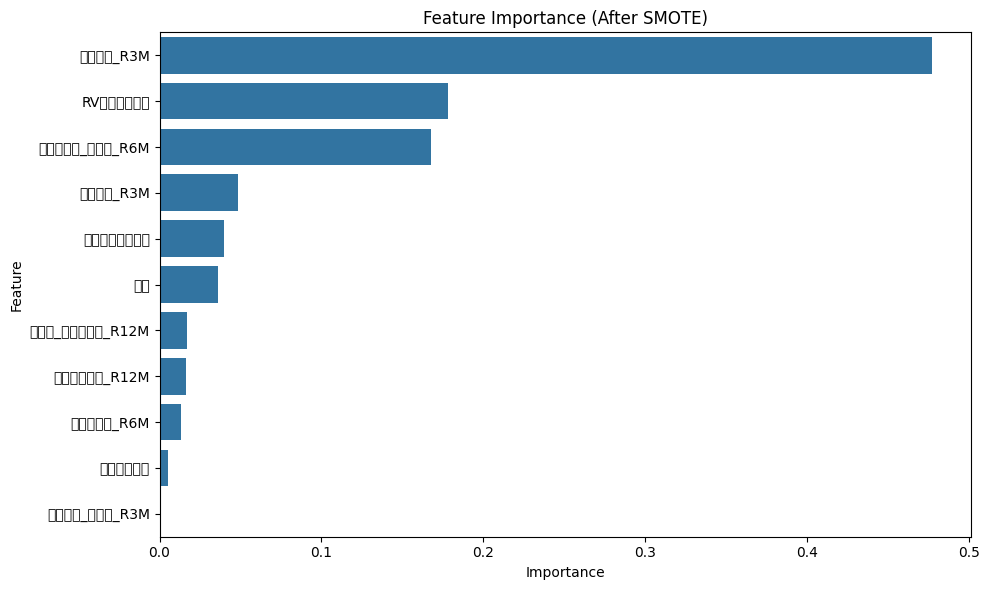

In [ ]:
# 📌 필수 라이브러리 설치
!pip install imbalanced-learn

# 📌 라이브러리 불러오기
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 CSV 파일 불러오기 (예: 구글드라이브 사용시 경로 수정 필요)
df = pd.read_csv("/card_test.csv")  # <-- 코랩에 올린 파일명 사용

# 📌 사용할 변수들
features = [
    '남녀구분코드', '연령', '상환개월수_결제일_R6M', '선결제건수_R6M', '카드이용한도금액',
    '연체건수_R3M', '포인트_이용포인트_R12M', '할인금액_R3M', '이용금액_카드론_R3M',
    'RV최소결제비율', '한도증액금액_R12M'
]
target = '회원여부_연체'

# 📌 데이터 전처리
X = df[features].copy()
y = df[target].copy()

# 문자열 컬럼 라벨 인코딩
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 결측 제거
X = X.dropna()
y = y[X.index]
y = LabelEncoder().fit_transform(y.astype(str))

# 📌 SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 📌 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 📌 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 📌 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 📌 피처 중요도 시각화
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (After SMOTE)')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("X_test 크기:", X_test.shape)



X_test 크기: (569, 11)


In [ ]:
print(classification_report(y_test, y_pred))
#연체 0, 1?

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       286
           1       0.98      1.00      0.99       283

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



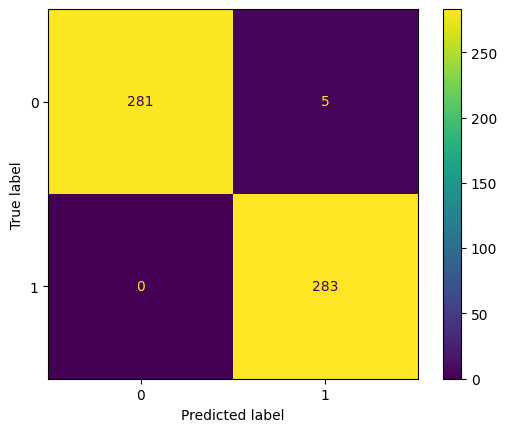

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
# 예시: 새로운 고객의 카드 정보 입력
new_customer = pd.DataFrame([{
    '남녀구분코드': 1,
    '연령': '30대',
    '상환개월수_결제일_R6M': 6,
    '선결제건수_R6M': 2,
    '카드이용한도금액': 5000000,
    '연체건수_R3M': 1,
    '포인트_이용포인트_R12M': 12000,
    '할인금액_R3M': 15000,
    '이용금액_카드론_R3M': 300000,
    'RV최소결제비율': 0.1,
    '한도증액금액_R12M': 0
}])

# 범주형 처리 (연령 등)
new_customer['연령'] = LabelEncoder().fit(df['연령']).transform(new_customer['연령'])

# 예측
prediction = model.predict(new_customer)
print("연체 예측 결과:", "연체" if prediction[0] == 1 else "정상")



연체 예측 결과: 정상


** 질문** 위의 코드처럼 input을 만들어서( 고객 정보를 input할 수 있는 것을 만들어서) 고객의 정보를 넣으면 이사람이 연체를 할 것인지 안 할것인지 예측을 하는 모델을 만들어야할지, 만약에 이게 아니라면 어떤걸 해야하나.
submission, csv 어떤식으롤 만들어야할지도 좀 궁금하다.
우리는 이제 특수한 경우. csv 포함 안 될 수도


# prompt: 여러분의 경우 제가 정해드린 타겟(Segment) 분류가 아닌 '연체를 할 것인지, 말 것인지' 를 타겟으로 삼으셨기 때문에 이진 분류(연체 안함 : 0, 연체함 : 1)의 분류 task로 재정의한 사례라고 볼 수 있습니다.
# 다만 input을 '새로 만드는 것'은 아니고, Y컬럼을 '연체 건수_RnM(여기서 n은 자연수를 의미)'을 바탕으로 0, 1로 변경하여 기존의 train 데이터를 사용하시면 됩니다.
# 이 내용은 첨부파일(노트북, csv)을 확인하시면 됩니다.

import pandas as pd
# 기존 코드는 그대로 유지하되, 예측 부분만 수정합니다.



In [ ]:

# 연체 여부로 타겟 이진화
# 연체 건수 > 0 이면 1, 그렇지 않으면 0
train['Y_binary'] = train['연체 건수_R6M'].apply(lambda x: 1 if x > 0 else 0)

# 기존 Y 컬럼 대신 Y_binary를 타겟으로 사용
X = train.drop(['연체 건수_R6M', 'Y_binary'], axis=1)
y = train['Y_binary']


NameError: name 'train' is not defined

In [ ]:
# 연체 여부로 타겟 이진화
# 연체 건수 > 0 이면 1, 그렇지 않으면 0
# Assuming '연체 건수_R6M' is a column in the original DataFrame 'df'
# If the goal is to use '회원여부_연체' as the target,
# and it's already binary (0 or 1), this block might not be needed.
# If '회원여부_연체' needs binarization, adjust the logic below to use that column.

# Use 'df' instead of 'train' as 'train' is not defined.
# Check if '연체 건수_R6M' column exists in df.
if '연체 건수_R6M' in df.columns:
    df['Y_binary'] = df['연체 건수_R6M'].apply(lambda x: 1 if x > 0 else 0)

    # Update X and y to use the new binary target and drop the original target column
    # Note: This will redefine X and y, potentially overwriting the previous X and y
    # created from '회원여부_연체'. Ensure this is the desired behavior.
    # Also, drop the original target column used before ('회원여부_연체') if it's not needed.
    columns_to_drop = [col for col in ['연체 건수_R6M', 'Y_binary', target] if col in df.columns]
    X = df.drop(columns=columns_to_drop, axis=1).copy() # Use .copy() to avoid SettingWithCopyWarning later
    y = df['Y_binary'].copy() # Use .copy()
else:
    print("Warning: '연체 건수_R6M' not found in the DataFrame. Cannot create Y_binary based on this column.")
    # If '연체 건수_R6M' doesn't exist and the user wants to stick to the original target '회원여부_연체',
    # ensure '회원여부_연체' is correctly formatted as binary (0 or 1).
    # X and y remain as defined earlier in the notebook using '회원여부_연체'.
    # You might want to re-run the data preprocessing steps if X and y were modified after the initial split.
    pass # Keep the original X and y defined earlier

# Re-apply preprocessing steps like LabelEncoding and dropna if X and y were redefined
# based on the new binary target.
# Example (adjust based on your original preprocessing steps):
# for col in X.select_dtypes(include='object').columns:
#     X[col] = LabelEncoder().fit_transform(X[col].astype(str))
#
# X = X.dropna()
# y = y[X.index] # Align y with X after dropping rows with NaNs

# Note: The SMOTE and train_test_split steps will need to be re-run
# after redefining X and y in this block if the new target is used.


> 이대로 하는지 코드 추가로 하는지 어떤게 부족한지



